In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape,LeakyReLU as LR,Activation,Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
# from IPython import display
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


Plot image data from x_train

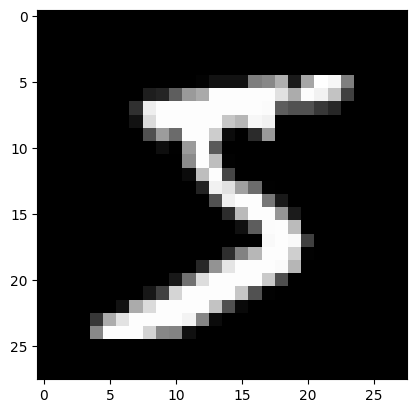

In [4]:
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [5]:
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),LR(),Dropout(0.5),
    Dense(256),LR(),Dropout(0.5),
    Dense(128),LR(),Dropout(0.5),
    Dense(64),LR(),Dropout(0.5),
    Dense(LATENT_SIZE),LR()])

In [6]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),LR(),Dropout(0.5),
    Dense(128),LR(),Dropout(0.5),
    Dense(256),LR(),Dropout(0.5),
    Dense(512),LR(),Dropout(0.5),
    Dense(784),Activation("sigmoid"),
    Reshape((28, 28))
])

In [7]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

----------- EPOCH 0 -----------
1/1 [==============================] - 0s 23ms/step


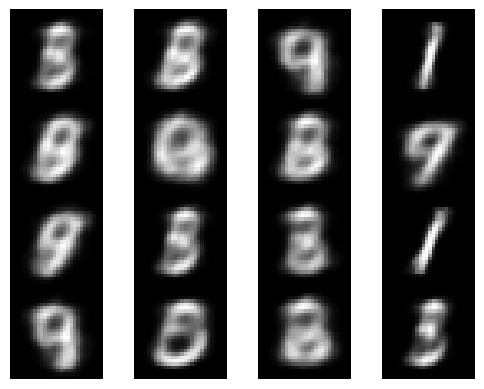

----------- EPOCH 1 -----------
1/1 [==============================] - 0s 17ms/step


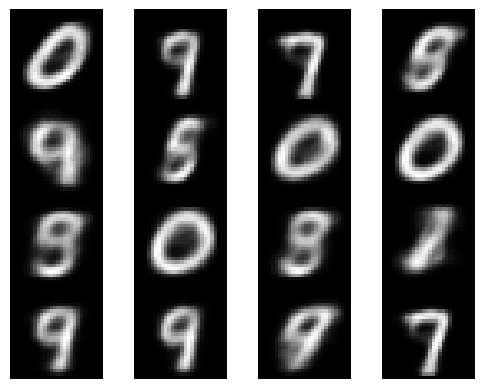

----------- EPOCH 2 -----------
1/1 [==============================] - 0s 16ms/step


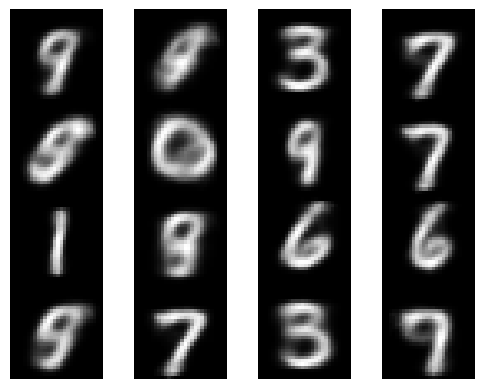

----------- EPOCH 3 -----------
1/1 [==============================] - 0s 20ms/step


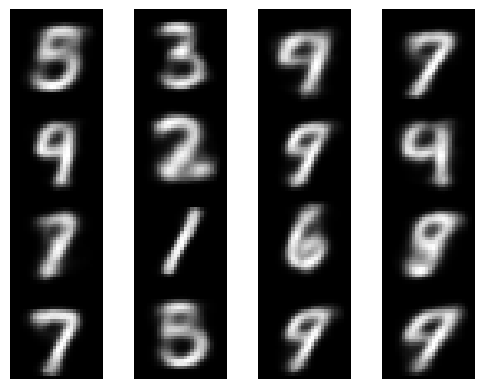

----------- EPOCH 4 -----------
1/1 [==============================] - 0s 19ms/step


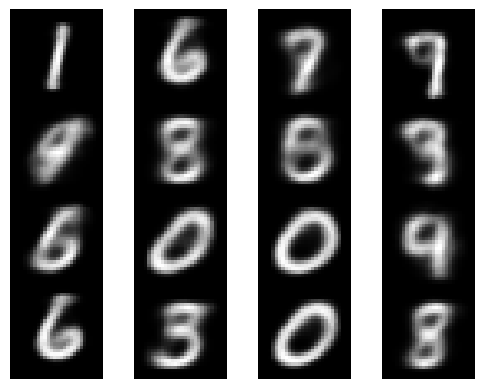

In [8]:
EPOCHS = 5
for epoch in range(EPOCHS):
  print("-----------", "EPOCH", epoch, "-----------")
  model.fit(x_train,x_train)
  fig, axs = plt.subplots(4, 4)
  rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

  # display.clear_output()

  for i in range(4):
    for j in range(4):
      axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
      axs[i, j].axis("off")

  plt.subplots_adjust(wspace = 0, hspace = 0)
  plt.show()